# Clasificación Categorías Prendas de Vestir
## Tópicos Avanzados de Analítica - Módulo 1: Deep Learning
Notebook elaborado por: Gloria, Andrés Luna, Carlos Dueñas, Sergio Segura

In [99]:
# Librerias para la creacion de los modelos
import tensorflow as tf
from keras.models import Model,Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, BatchNormalization, MaxPooling2D,Input, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.models import load_model
from keras.utils import np_utils

# Otra librerías
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.metrics import confusion_matrix
from itertools import product

### 1. Obtención y exploración base de datos
Estadísticas de la base de datos

In [76]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

print("Número de imágenes de entrenamiento:",training_images.shape[0])
print("Número de imágenes de evaluación:",test_images.shape[0])
print("Tamaño de las imágenes",training_images.shape[1:])

Número de imágenes de entrenamiento: 60000
Número de imágenes de evaluación: 10000
Tamaño de las imágenes (28, 28)


Visualización de ejemplos de la base de datos

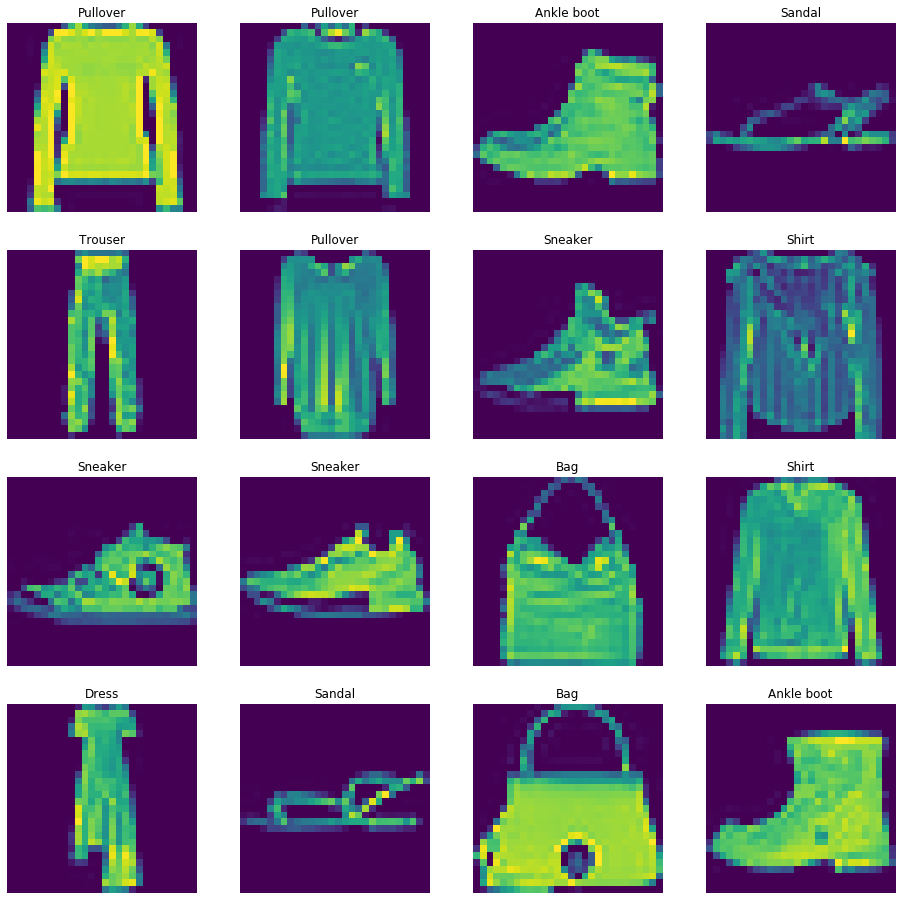

In [77]:
### Mostrar ejemplos de imágenes originales
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

for i in range(16):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    ran = np.random.randint(len(training_labels))
    plt.gca().set_title(class_names[training_labels[ran]])
    plt.imshow(training_images[ran])

plt.show()

Exploración valores mínimos y máximos de las imágenes

In [78]:
print("Rango de valores imágenes de entrenamiento: ",np.min(training_images),"-",np.max(training_images))
print("Rango de valores imágenes de evaluación: ",np.min(test_images),"-",np.max(test_images))

Rango de valores imágenes de entrenamiento:  0 - 255
Rango de valores imágenes de evaluación:  0 - 255


### 2. Pre-procesamiento de los datos

Normalización y cambio de forma de las imágenes

In [79]:
training_images  = training_images / 255.0
test_images = test_images / 255.0
training_images.astype('float32')
test_images.astype('float32')
training_images = training_images.reshape(training_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
print("Nueva dimension imágenes de entrenamiento: ",training_images.shape)
print("Nueva dimension imágenes de evaluación: ",test_images.shape)
print("Rango de valores imágenes de entrenamiento: ",np.min(training_images),"-",np.max(training_images))
print("Rango de valores imágenes de evaluación: ",np.min(test_images),"-",np.max(test_images))

Nueva dimension imágenes de entrenamiento:  (60000, 28, 28, 1)
Nueva dimension imágenes de evaluación:  (10000, 28, 28, 1)
Rango de valores imágenes de entrenamiento:  0.0 - 1.0
Rango de valores imágenes de evaluación:  0.0 - 1.0


Codificación de labels de las imágenes (One-Hot)

In [80]:
training_labels = np_utils.to_categorical(training_labels,10)
test_labels = np_utils.to_categorical(test_labels,10)
print("Nueva dimensión de los labels de entrenamiento: ",training_labels.shape)
print("Nueva dimensión de los labels de evaluación: ",test_labels.shape)

Nueva dimensión de los labels de entrenamiento:  (60000, 10)
Nueva dimensión de los labels de evaluación:  (10000, 10)


### 3 Creación y entrenamiento del modelo

In [81]:
modelo = Sequential()
modelo.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))
modelo.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(24, kernel_size=3, activation='relu',padding='same'))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.2))
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.3))
modelo.add(Dense(10, activation='softmax'))

modelo.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
modelo.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_26 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_27 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 24)        6936      
_________________________________________________________________
dropout_28 (Dropout)         (None, 28, 28, 24)       

Creación del Callback para guardar el mejor modelo monitoreando la variable de accuracy de validación.

In [82]:
callback_list=[ModelCheckpoint(filepath='modeloFashionMNIST.h5', monitor='val_acc', save_best_only=True, mode='max')]

Entrenamiento del modelo

In [ ]:
modelo.fit(training_images,training_labels,
           validation_data=(test_images,test_labels),
           batch_size=128,
           epochs=20,
           verbose=1,
           callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1227s 20ms/step - loss: 0.5218 - accuracy: 0.8162 - val_loss: 0.5396 - val_accuracy: 0.8839
Epoch 2/20


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


60000/60000 [==============================] - 1298s 22ms/step - loss: 0.3146 - accuracy: 0.8875 - val_loss: 0.2583 - val_accuracy: 0.9057
Epoch 3/20
60000/60000 [==============================] - 1475s 25ms/step - loss: 0.2629 - accuracy: 0.9039 - val_loss: 0.2419 - val_accuracy: 0.9092
Epoch 4/20
60000/60000 [==============================] - 1565s 26ms/step - loss: 0.2348 - accuracy: 0.9123 - val_loss: 0.2415 - val_accuracy: 0.9122
Epoch 5/20
60000/60000 [==============================] - 1620s 27ms/step - loss: 0.2171 - accuracy: 0.9195 - val_loss: 0.2096 - val_accuracy: 0.9260
Epoch 6/20
60000/60000 [==============================] - 1586s 26ms/step - loss: 0.1977 - accuracy: 0.9267 - val_loss: 0.2021 - val_accuracy: 0.9267
Epoch 7/20
60000/60000 [==============================] - 1611s 27ms/step - loss: 0.1842 - accuracy: 0.9317 - val_loss: 0.2099 - val_accuracy: 0.9230
Epoch 8/20
60000/60000 [==============================] - 1352s 23ms/step - loss: 0.1726 - accuracy: 0.9353 - v

Exportar modelos generados

In [36]:
# Guardar arquitectura del modelo
model_json = modelo.to_json()
with open("./Model/model_in_json.json", "w") as json_file:
    json.dump(model_json, json_file)
# Guardar pesos del modelo
modelo.save_weights("./Model/model_weights.h5")

### 4. Evaluación del modelo
Visualización de evolución del entrenamiento

In [114]:
def accuracy_loss_plots(model):
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    ax1.plot(model.history.history['accuracy'], label = 'Accuracy de entrenamiento')
    ax1.plot(model.history.history['val_accuracy'], label = 'Accuracy de evaluación')
    ax1.set_title('Evolución Accuracy por época')
    ax1.set_xlabel('Época')
    ax1.set_ylim(0.8,1)
    ax1.legend()
    ax2.plot(model.history.history['loss'], label='Loss de entrenamiento')
    ax2.plot(model.history.history['val_loss'], label='Loss de evaluación')
    ax2.set_title('Evolución Loss por época')
    ax2.set_xlabel('Época')
    ax2.set_ylim(0,1)
    ax2.legend()

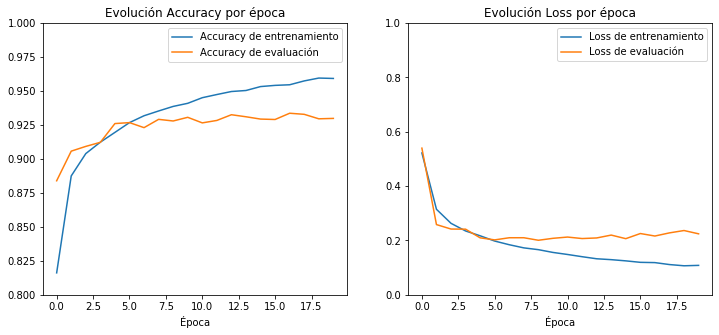

In [115]:
accuracy_loss_plots(modelo)

Cálculo métricas de desempeño finales

In [105]:
val_loss,val_acc = modelo.evaluate(test_images,test_labels)
print("Valor 'loss' de evaluación: ",val_loss)
print("Valor 'accuracy' de evaluación: ",val_acc)

10000/10000 [==============================] - 67s 7ms/step
Valor 'loss' de evaluación:  0.22433974907249213
Valor 'accuracy' de evaluación:  0.9297999739646912


Visualización matriz de confusión

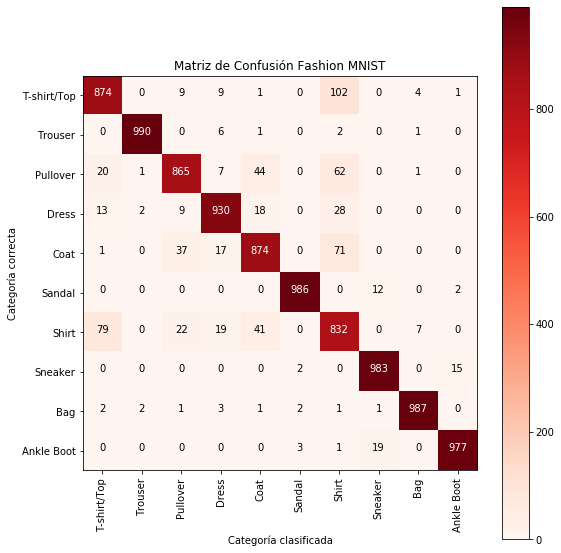

In [106]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

#Create Multiclass Confusion Matrix

preds = modelo.predict(test_images)
cm = confusion_matrix(np.argmax(test_labels,axis=1), np.argmax(preds,axis=1))

plt.figure(figsize=(8,8))
plt.imshow(cm,cmap=plt.cm.Reds)
plt.title('Matriz de Confusión Fashion MNIST')
plt.colorbar()
plt.xticks(np.arange(10), classes, rotation=90)
plt.yticks(np.arange(10), classes)

for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('Categoría correcta')
plt.xlabel('Categoría clasificada');

### 5. Visualización predicciones del Modelo
Cargar modelo entrenado

In [136]:
from keras.models import load_model
from keras.models import model_from_json
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

with open('./Model/model_in_json.json','r') as f:
    model_json = json.load(f)

modelo_entrenado = model_from_json(model_json)
modelo_entrenado.load_weights('./Model/model_weights.h5')

Cargar imagen de evaluación para visualización de predicción

Clase predecida:  Shirt
Clase correcta:  Pullover


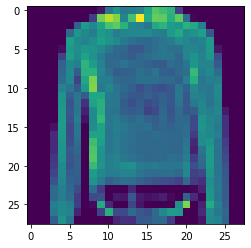

In [147]:
_, (test_im, test_lbl) = mnist.load_data()
indiceImagen = np.random.randint(len(test_lbl))
test_im2 = test_im.reshape(test_im.shape[0], 28, 28, 1)
prediccion = modelo_entrenado.predict(np.expand_dims(test_im2[indiceImagen], axis=0))
plt.imshow(test_im[indiceImagen])
print("Clase predecida: ",classes[np.argmax(prediccion)])
print("Clase correcta: ",classes[test_lbl[indiceImagen]])

Evaluación modelo con imágenes más reales

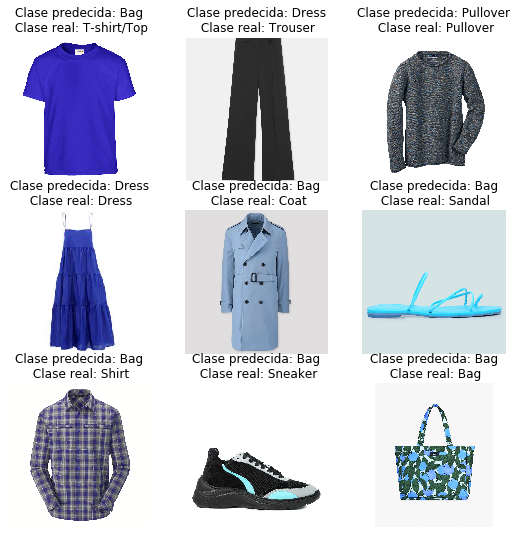

In [143]:
nrows = 3
ncols = 3

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

for i in range (0,9):
    a = cv2.imread("./OtherImages/" + str(i) +".jpg")
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    final = cv2.resize(gray, (28,28))
    final = final / 255.0
    prediccion = modelo_entrenado.predict(np.expand_dims(np.expand_dims(final, axis=-1),axis=0))
    sp = plt.subplot(nrows, ncols, i + 1)
    plt.gca().set_title("Clase predecida: " + str(classes[np.argmax(prediccion)]) + "\n Clase real: " + str(classes[i]))
    sp.axis('Off')
    plt.imshow(a)

plt.show()